In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df0=pd.read_csv('dataset.csv', low_memory=False)
df0

,Unnamed: 0,locality_name,price,area,house_type,total_beds
0,0,Tarwala Nagar,8499000,2260,house,4
1,1,Dombivali,6790000,500,house,2
2,2,Wagholi,6030000,773,house,3
3,3,Ambegaon Budruk,3537000,477,house,1
4,4,Dombivali,9500000,917,house,3
...,...,...,...,...,...,...
105586,191269,Pirangut,8060000,947,house,3
105587,191270,Pirangut,4000000,448,house,1
105588,191271,Pirangut,16800000,1887,Independent House,4
105589,191272,Pirangut,7500000,768,house,3


In [3]:
df0=df0.drop(['Unnamed: 0'],axis='columns')
df0

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105588,Pirangut,16800000,1887,Independent House,4
105589,Pirangut,7500000,768,house,3


In [4]:
df0.shape

(105591, 5)

In [5]:
df0.groupby('house_type')['house_type'].agg('count')

house_type
Independent Floor       175
Independent House       395
Penthouse                 3
Studio Apartment       1288
Villa                   764
house                102966
Name: house_type, dtype: int64

In [6]:
df0.isnull().sum()

locality_name    0
price            0
area             0
house_type       0
total_beds       0
dtype: int64

In [7]:
df0

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105588,Pirangut,16800000,1887,Independent House,4
105589,Pirangut,7500000,768,house,3


In [8]:
new=df0

In [9]:
#new=new.drop(['Unnamed: 0','Unnamed: 11'],axis='columns')
new

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105588,Pirangut,16800000,1887,Independent House,4
105589,Pirangut,7500000,768,house,3


In [10]:
new

,locality_name,price,area,house_type,total_beds
0,Tarwala Nagar,8499000,2260,house,4
1,Dombivali,6790000,500,house,2
2,Wagholi,6030000,773,house,3
3,Ambegaon Budruk,3537000,477,house,1
4,Dombivali,9500000,917,house,3
...,...,...,...,...,...
105586,Pirangut,8060000,947,house,3
105587,Pirangut,4000000,448,house,1
105588,Pirangut,16800000,1887,Independent House,4
105589,Pirangut,7500000,768,house,3


In [11]:
#####################################################################################################################################

In [12]:
#data analysis

In [13]:
print(new)

          locality_name     price  area         house_type  total_beds
0         Tarwala Nagar   8499000  2260              house           4
1             Dombivali   6790000   500              house           2
2               Wagholi   6030000   773              house           3
3       Ambegaon Budruk   3537000   477              house           1
4             Dombivali   9500000   917              house           3
...                 ...       ...   ...                ...         ...
105586         Pirangut   8060000   947              house           3
105587         Pirangut   4000000   448              house           1
105588         Pirangut  16800000  1887  Independent House           4
105589         Pirangut   7500000   768              house           3
105590         Pirangut   6583000   689              house           2

[105591 rows x 5 columns]


In [14]:
new.shape

(105591, 5)

In [15]:
#(Exploratory Data Analysis - EDA)

In [16]:
new.describe() 

,price,area,total_beds
count,1.055910e+05,105591.000000,105591.000000
mean,1.158809e+07,905.891373,1.978947
std,1.802086e+07,488.864639,0.811650
min,3.000000e+05,113.000000,0.000000
25%,5.052000e+06,611.000000,1.000000
50%,7.547000e+06,789.000000,2.000000
75%,1.250000e+07,1060.000000,2.000000
max,9.856000e+08,7500.000000,4.000000


In [17]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105591 entries, 0 to 105590
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   locality_name  105591 non-null  object
 1   price          105591 non-null  int64 
 2   area           105591 non-null  int64 
 3   house_type     105591 non-null  object
 4   total_beds     105591 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ MB


In [18]:
# Data Cleaning

In [19]:
null_counts = new.isnull().sum()
print(null_counts)

locality_name    0
price            0
area             0
house_type       0
total_beds       0
dtype: int64


In [20]:
 #Exploratory Data Analysis (EDA)

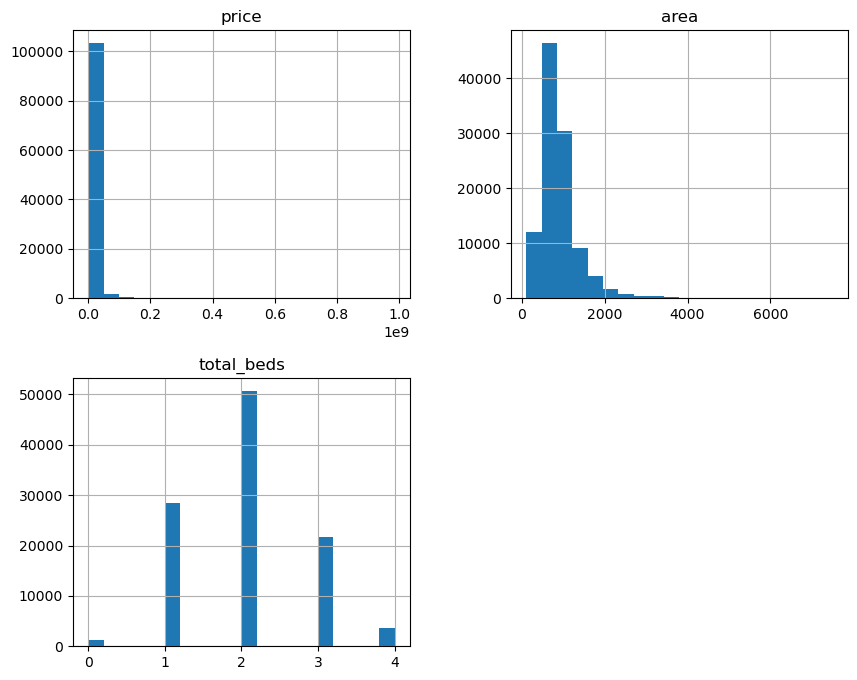

In [21]:
new.hist(figsize=(10, 8), bins=20)
plt.show()

In [22]:
le = LabelEncoder()
new['locality_id'] = le.fit_transform(new['locality_name'])

In [23]:
new.groupby('locality_id')['locality_id'].agg('count')

locality_id
0       1
1       1
2       1
3       7
4       4
       ..
720     3
721    50
722    42
723    16
724     1
Name: locality_id, Length: 725, dtype: int64

<Axes: >

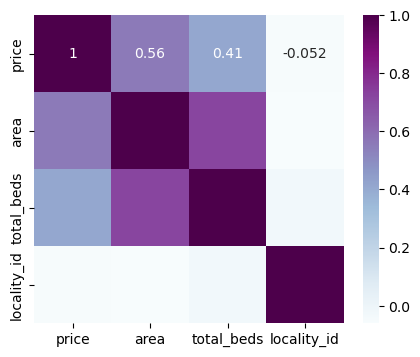

In [24]:
selected_columns = new[['price', 'area', 'total_beds','locality_id']]
import seaborn as sns
import matplotlib.pyplot as plt

corr = selected_columns.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot = True, cmap = 'BuPu')



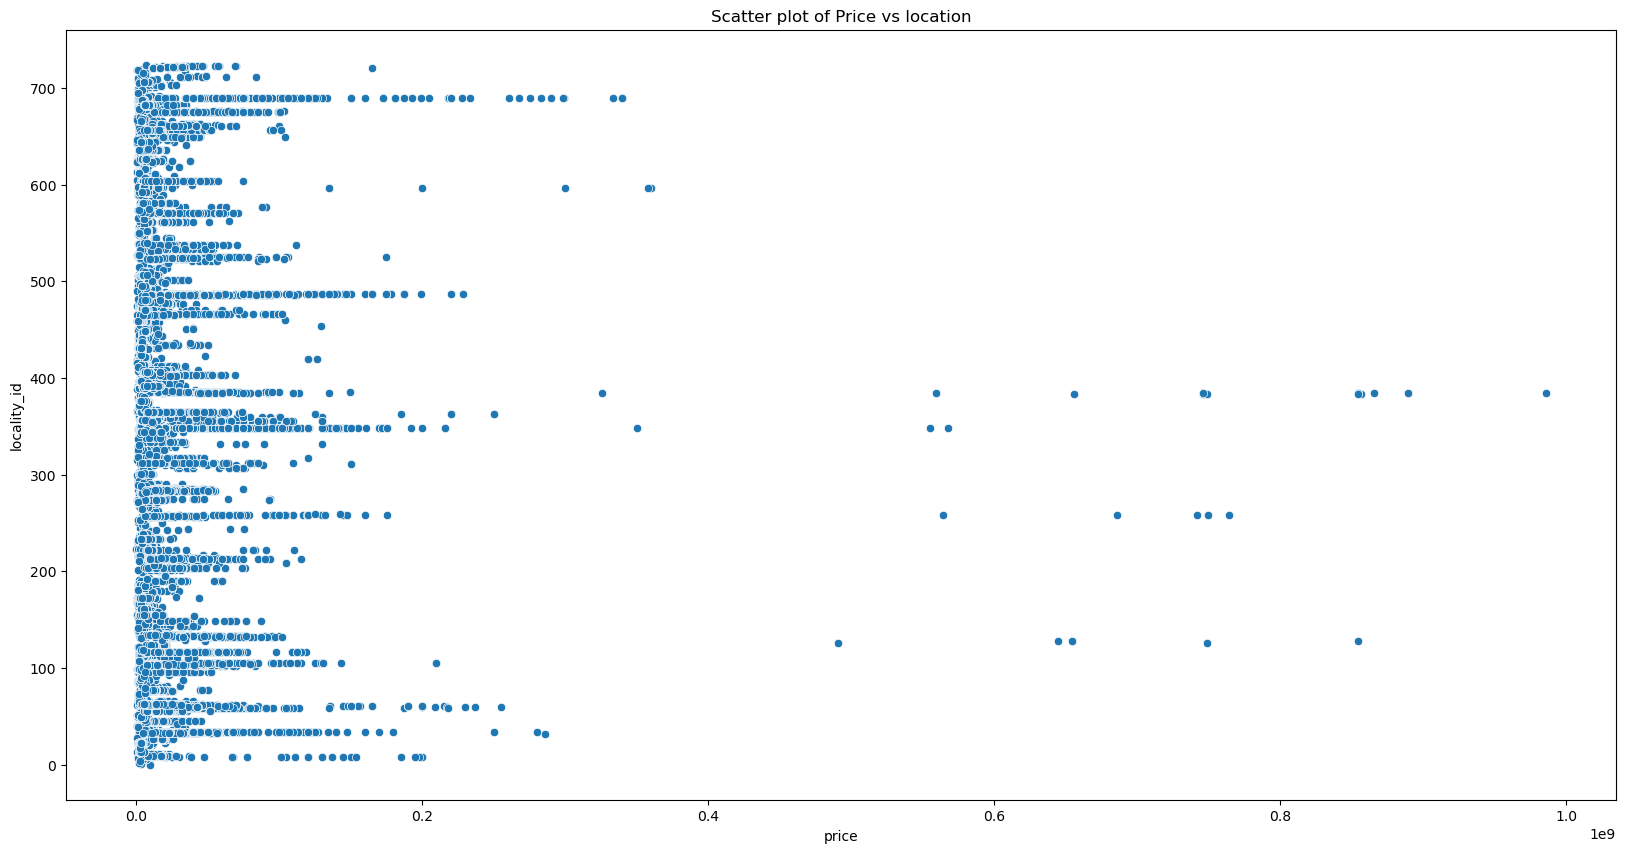

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='price', y='locality_id', data=new)
plt.title('Scatter plot of Price vs location')
plt.show()


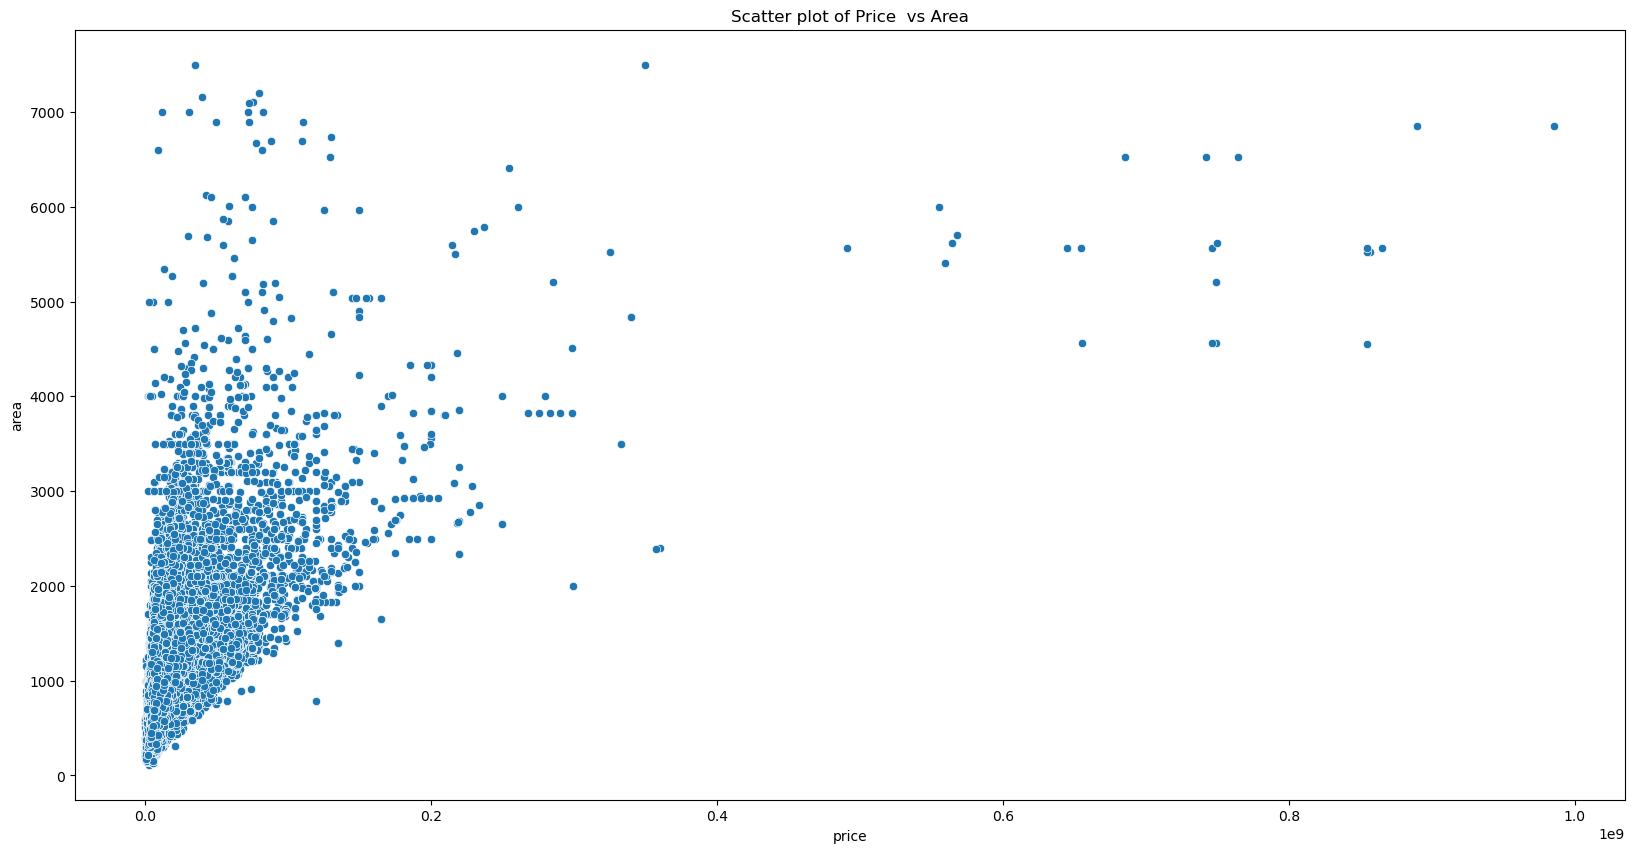

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='price', y='area', data=new)
plt.title('Scatter plot of Price  vs Area')
plt.show()

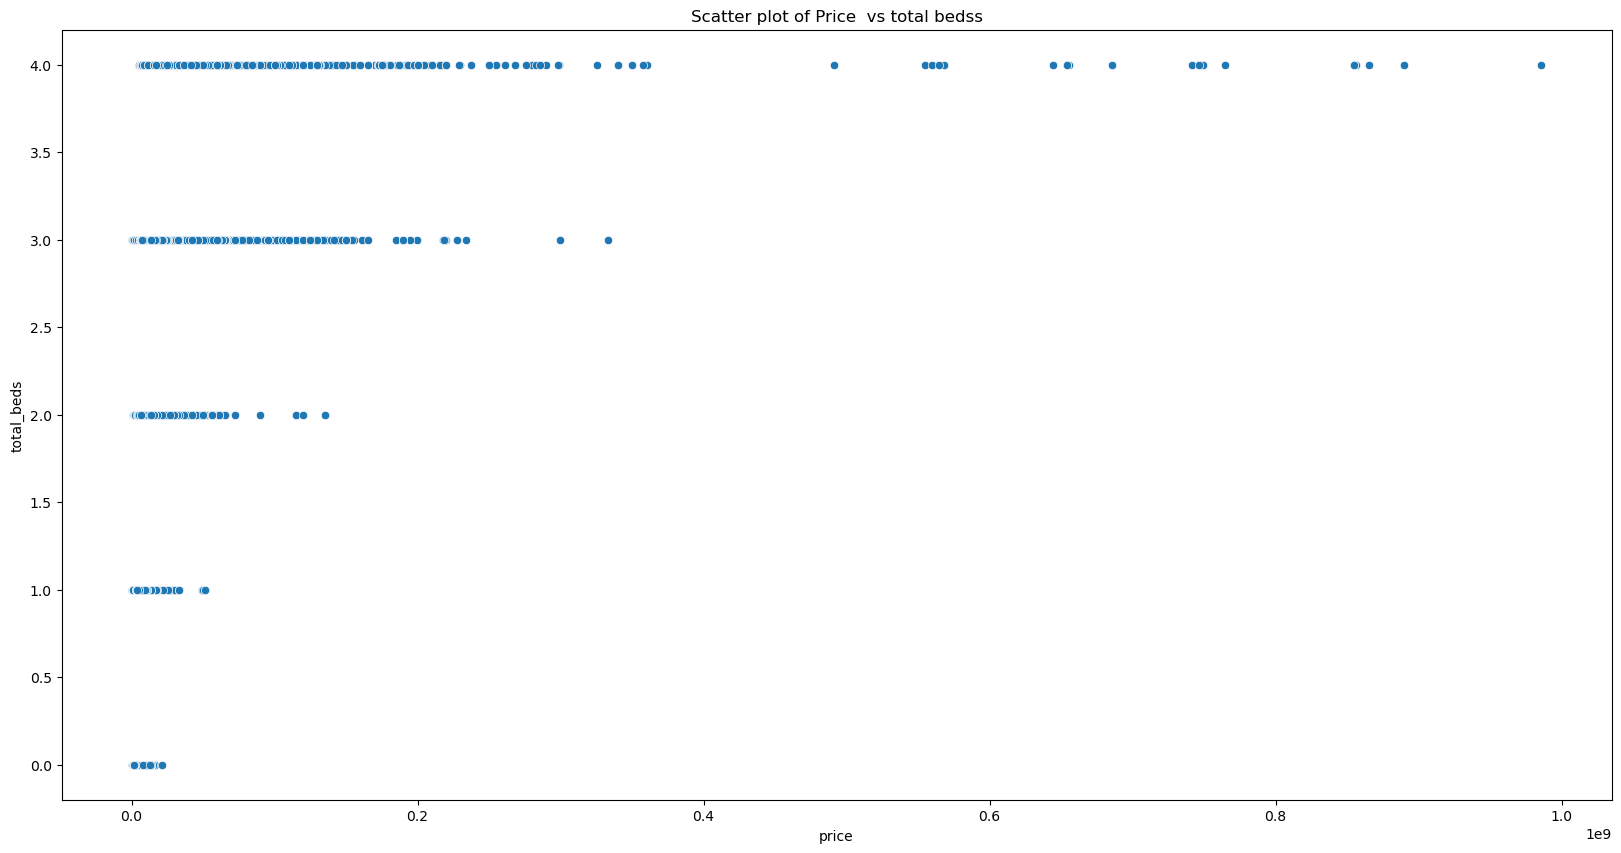

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='price', y='total_beds', data=new)
plt.title('Scatter plot of Price  vs total bedss')
plt.show()

In [28]:
new.groupby('locality_name')['locality_name'].agg('count')

locality_name
4 Bunglows                  1
60 Pune Nashik Highway      1
Aamrai                      1
Adaigaon                    7
Additional M.I.D.C          4
                           ..
vadner dumala               3
vasant vihar thane west    50
versova                    42
vile parle west            16
worli sea Fase              1
Name: locality_name, Length: 725, dtype: int64

In [29]:
dummies2=pd.get_dummies(new.locality_name)


In [30]:
new=pd.concat([new,dummies2],axis='columns')


In [31]:
new=new.drop(['locality_name'],axis='columns')



In [32]:
##########################################################################

# TRAINING MODEL

In [33]:
x = new.drop(['price','house_type'],axis='columns')


In [34]:
y=new.price


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)



In [57]:
#linear regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape:.3f}%")


R-squared: -2823824567807.4756
Mean Absolute Error: 555923598283.2203
Mean Absolute Percentage Error: 24452583.524%


In [59]:
#decision tree
#CART

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Absolute Percentage Error: {mape:.3f}%")


R-squared: 0.776
Mean Absolute Error: 1563602.016
Mean Absolute Percentage Error: 12.336%


In [61]:
#lasso

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
lasso_clf=linear_model.Lasso()
lasso_clf.fit(x_train,y_train)
y_pred = lasso_clf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape:.3f}%")


C:\Users\anike\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.419e+18, tolerance: 1.754e+15
  model = cd_fast.enet_coordinate_descent(


R-squared: 0.6628880118510967
Mean Absolute Error: 3806045.0631688586
Mean Absolute Percentage Error: 42.988%


In [63]:
#here we use DecisionTreeRegressor CART beacuse it give better result

In [242]:
def predict_dt(location, sqft, beds):
    try:
        if location not in x.columns:
            print("Location not found in the model. Please try another location.")
        loc_index = np.where(x.columns == location)[0][0]
        X = np.zeros(len(x.columns))
        X[0] = sqft
        X[1] = beds
        if loc_index >= 0:
            X[loc_index] = 1
        return dt.predict([X])[0]
    except IndexError as e:
        return 0

In [ ]:
import warnings
Location =input("Enter the location : ")
Size=int(input("Enter the size of house in sqft :  "))
Bed=int(input("Enter the number of bedrooms : "))
s=predict_dt(Location,Size,Bed)
print(f"Predicted Price is [ {s} rs] ")
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
locality_name    area	total_beds
Bhugaon	       	
Chembur    	    
Kharadi	       
Lohegaon	    
Andheri East   
Kurla	        
Bandra East	  
Mira Road East	
